In [34]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [35]:
# Reutersデータセットを読み込む
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [36]:
# 訓練データとテストデータの数
print("train_data: {}, test_data: {}".format(len(train_data), len(test_data)))

train_data: 8982, test_data: 2246


In [37]:
# 訓練データの中身の確認
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [38]:
# ニュースサンプルをテキストに変換する
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

#デコードしたニュースを表示 
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [39]:
# ラベルの確認
train_labels[10]

3

In [40]:
# データのベクトル化 one-hot-encoding
def to_one_hot(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 訓練データのベクトル化
x_train = to_one_hot(train_data)
# テストデータのベクトル化
x_test = to_one_hot(test_data)

In [41]:
# ラベルのベクトル化
# kerasのメソッドで行う
from tensorflow.keras.utils import to_categorical

# 訓練データのベクトル化
one_hot_train_labels = to_categorical(train_labels)
# テストデータのベクトル化
one_hot_test_labels = to_categorical(test_labels)

In [42]:
# モデルの定義
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))

In [43]:
# モデルのコンパイル
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [44]:
# 検証データセットの設定
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [45]:
# モデルの訓練
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 354us/sample - loss: 2.5383 - acc: 0.5005 - val_loss: 1.7277 - val_acc: 0.6450
Epoch 2/20
7982/7982 [==============================] - 1s 181us/sample - loss: 1.4265 - acc: 0.6969 - val_loss: 1.3414 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 166us/sample - loss: 1.0824 - acc: 0.7712 - val_loss: 1.1599 - val_acc: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 170us/sample - loss: 0.8546 - acc: 0.8198 - val_loss: 1.0490 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 167us/sample - loss: 0.6811 - acc: 0.8545 - val_loss: 0.9874 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 166us/sample - loss: 0.5440 - acc: 0.8894 - val_loss: 0.9399 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 151us/sample - loss: 0.4388 - acc: 0.9117 - val_loss: 0.9694 - va

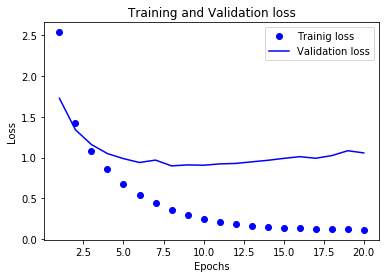

In [46]:
# 訓練データと検証データでの損失値をプロット

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Trainig loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

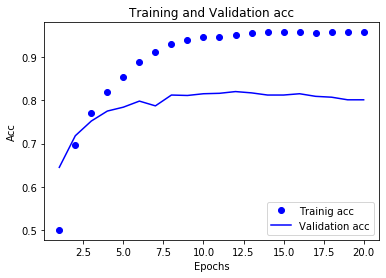

In [47]:
# 訓練データと検証データでの正答率をプロット
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Trainig acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()

In [48]:
# モデルの訓練をやり直す
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=8,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 3s 359us/sample - loss: 2.4722 - acc: 0.5142 - val_loss: 1.6196 - val_acc: 0.6530
Epoch 2/8
7982/7982 [==============================] - 1s 157us/sample - loss: 1.3534 - acc: 0.7231 - val_loss: 1.3045 - val_acc: 0.7230
Epoch 3/8
7982/7982 [==============================] - 1s 153us/sample - loss: 1.0205 - acc: 0.7848 - val_loss: 1.1407 - val_acc: 0.7550
Epoch 4/8
7982/7982 [==============================] - 1s 165us/sample - loss: 0.8043 - acc: 0.8277 - val_loss: 1.0266 - val_acc: 0.7830
Epoch 5/8
7982/7982 [==============================] - 1s 174us/sample - loss: 0.6430 - acc: 0.8634 - val_loss: 0.9879 - val_acc: 0.7940
Epoch 6/8
7982/7982 [==============================] - 2s 193us/sample - loss: 0.5171 - acc: 0.8910 - val_loss: 0.9210 - val_acc: 0.7980
Epoch 7/8
7982/7982 [==============================] - 2s 189us/sample - loss: 0.4112 - acc: 0.9164 - val_loss: 0.9328 - val_acc: 

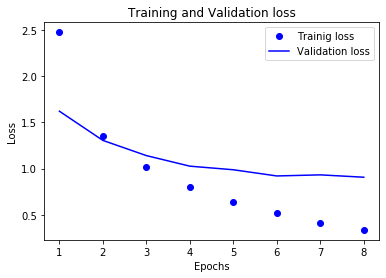

In [49]:
# 訓練データと検証データでの損失値をプロット

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Trainig loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

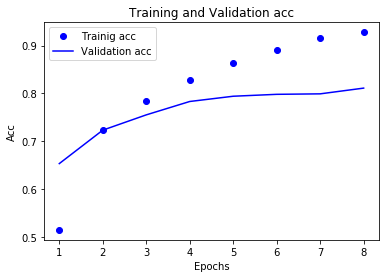

In [50]:
# 訓練データと検証データでの正答率をプロット
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Trainig acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()

In [51]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [52]:
# 結果を表示
results

[0.9824479110306751, 0.78673196]

In [53]:
# 新しいデータの予測値を生成
predictions = model.predict(x_test)

In [54]:
predictions

array([[2.5412557e-04, 5.5750005e-04, 1.2720008e-04, ..., 1.6560948e-04,
        6.0842895e-06, 7.9330030e-06],
       [1.2101330e-03, 2.0691299e-01, 2.0041650e-02, ..., 3.1373152e-04,
        1.1256194e-04, 4.3842077e-04],
       [2.9833836e-03, 8.6583710e-01, 7.4044941e-03, ..., 2.8007338e-03,
        3.8292722e-04, 1.7071550e-03],
       ...,
       [6.8968795e-05, 1.5406223e-04, 5.1720308e-05, ..., 3.6951067e-05,
        8.4247304e-06, 9.8686132e-06],
       [7.0742019e-03, 1.2404261e-01, 9.9974889e-03, ..., 1.3451732e-03,
        3.3264601e-04, 3.1753565e-04],
       [3.3873043e-04, 5.5562341e-01, 1.3513335e-02, ..., 3.8930960e-04,
        2.7105107e-04, 3.4666900e-04]], dtype=float32)

In [55]:
# 情報ボトルネックを持つモデル
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=128,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 559us/sample - loss: 2.7608 - acc: 0.3024 - val_loss: 2.0988 - val_acc: 0.5630
Epoch 2/20
7982/7982 [==============================] - 2s 263us/sample - loss: 1.7202 - acc: 0.5836 - val_loss: 1.6034 - val_acc: 0.5890
Epoch 3/20
7982/7982 [==============================] - 2s 266us/sample - loss: 1.3912 - acc: 0.6233 - val_loss: 1.4758 - val_acc: 0.6420
Epoch 4/20
7982/7982 [==============================] - 2s 268us/sample - loss: 1.2269 - acc: 0.6696 - val_loss: 1.4148 - val_acc: 0.6520
Epoch 5/20
7982/7982 [==============================] - 3s 331us/sample - loss: 1.1029 - acc: 0.6818 - val_loss: 1.3953 - val_acc: 0.6600
Epoch 6/20
7982/7982 [==============================] - 3s 330us/sample - loss: 0.9945 - acc: 0.7147 - val_loss: 1.3506 - val_acc: 0.6860
Epoch 7/20
7982/7982 [==============================] - 2s 311us/sample - loss: 0.8982 - acc: 0.7521 - val_loss: 1.3516 - va

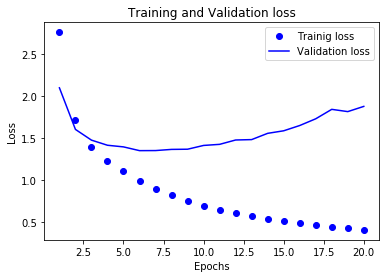

In [56]:
# 訓練データと検証データでの損失値をプロット

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label="Trainig loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

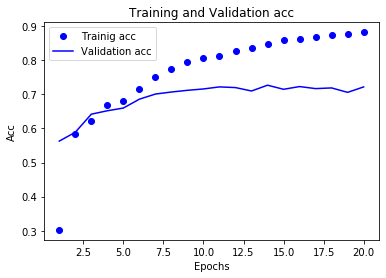

In [57]:
# 訓練データと検証データでの正答率をプロット
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Trainig acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()